In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from itertools import product
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

from exp_data import single_continuous_treatment
from estimator_model.double_ml import DML4CATE

## Single continuous treatment.
Valid estimation models include
- DoubleML
- DeepIV
- CausalTree

In [2]:
train, val, treatment_effect = single_continuous_treatment()

In [3]:
adjustment = train.columns[:-3]
covariate = 'c_0'
outcome = 'outcome'
treatment = 'treatment'

In [26]:

dml = DML4CATE(
    x_model=RandomForestRegressor(),
    y_model=RandomForestRegressor(),
    cf_fold=3,
)
dml.fit(
    train,
    outcome,
    treatment,
    adjustment,
    covariate, 
)

In [31]:
def exp_te(x): return np.exp(2*x)
dat = np.array(list(product(np.arange(0, 1, 0.01), repeat=1))).ravel()
data_test = pd.DataFrame({'c_0': dat})
true_te = np.array([exp_te(xi) for xi in data_test[covariate]])
ested_te = dml.estimate(data_test).ravel()

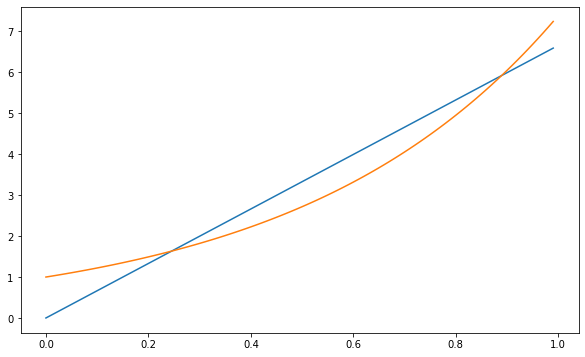

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(dat, ested_te, label='dml estimated')
plt.plot(dat, true_te, label='true')